In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts import claim, eval, display, stats
from scripts.constants import Constants

experiments_path = os.path.abspath(os.path.expandvars("$GITHUB_HOME/claim-extraction/experiments"))

test_index = 1
dataset_name = "cs_dataset"
json_tables = "CS_Dataset.json"

tables_file_path = os.path.join(experiments_path, Constants.EXTRACTED_TABLE_DIR, json_tables)

dataset_path = os.path.join(experiments_path, Constants.OUTPUT_DIR, dataset_name, str(test_index))
ground_truth_path = os.path.join(experiments_path, Constants.GROUND_TRUTH_DIR, "dataset")

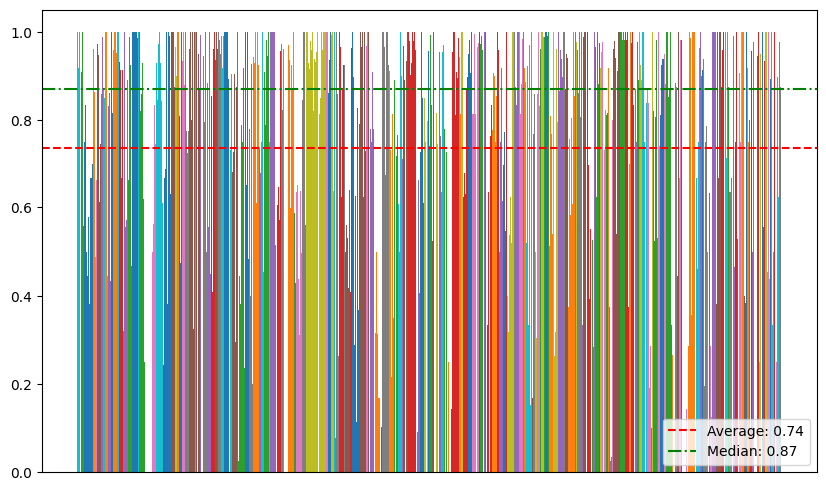

# of Tables: 1244


In [2]:
d_results = eval.evaluate_extracted_articles(tables_file_path, dataset_path, False, False)

display.plot_grouped_bars(d_results)

print(f"# of Tables: {len(d_results)}")

Data Tables Coverage Results - # Tables: 434


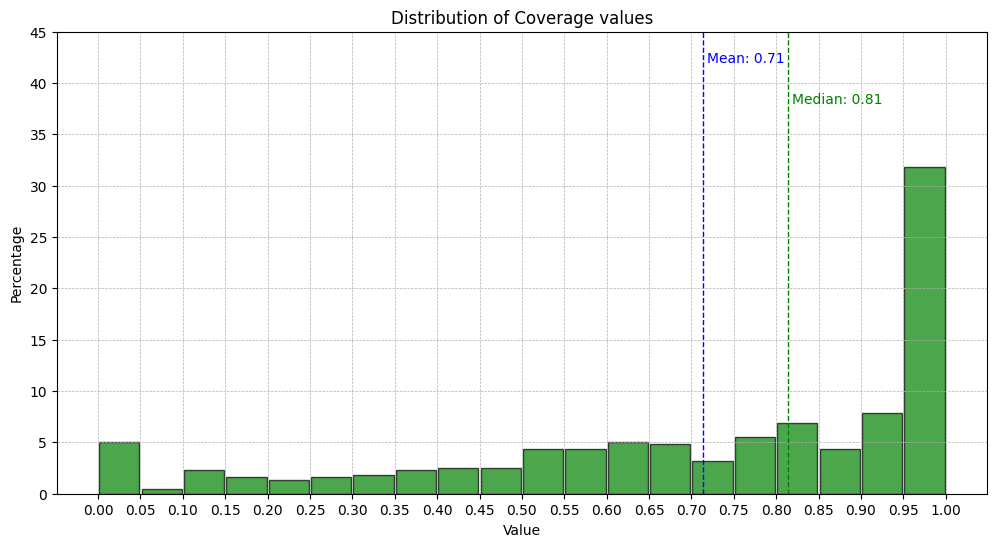

Outcome Tables Coverage Results - # Tables: 739


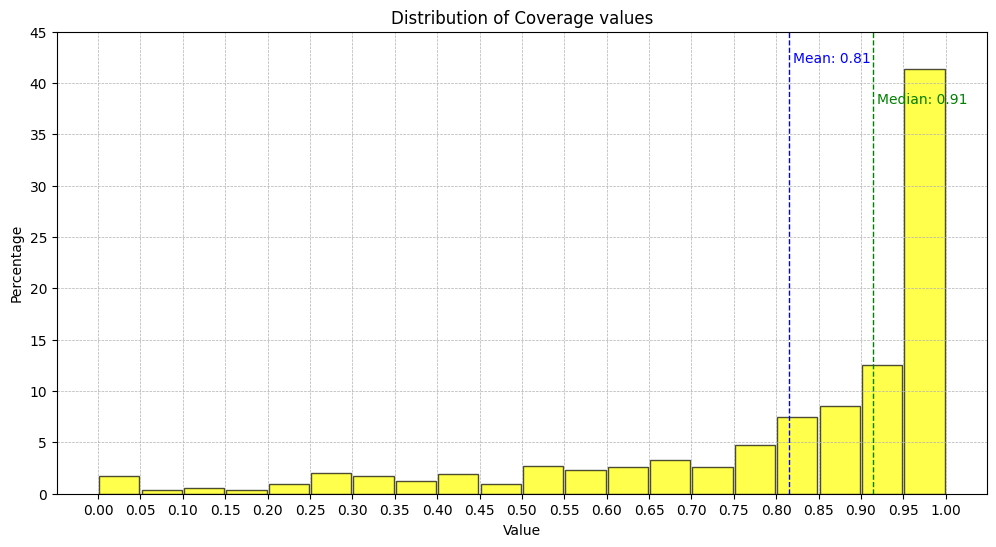

All Correct Tables Coverage Results - # Tables 1173


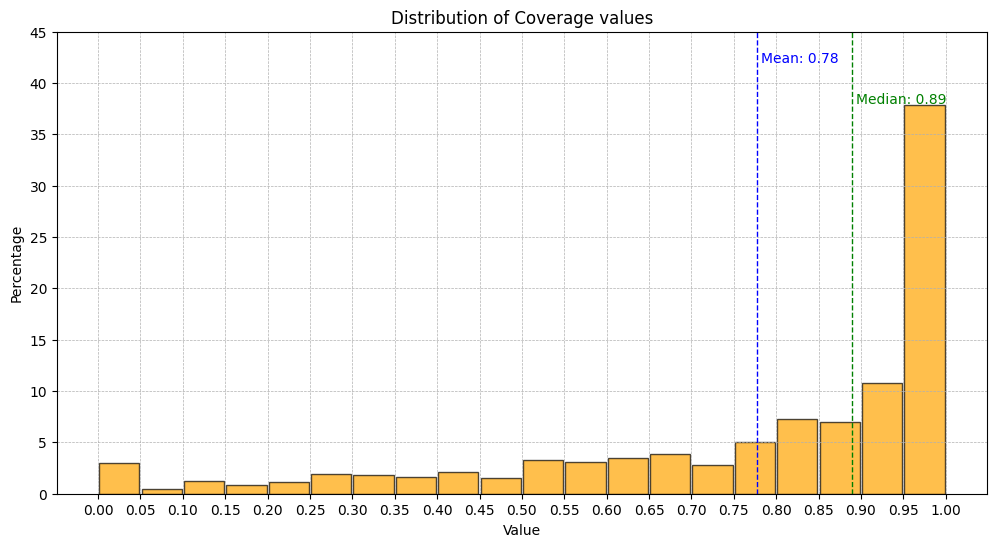

Bad Extractions: 71/1244 - 0.0571


In [3]:
outcome_claims, data_claims, wrong_claims = stats.get_claim_types(dataset_path)

outcome_results = [x for x in d_results if x[0] in outcome_claims]
data_results = [x for x in d_results if x[0] in data_claims]

all_results = outcome_results + data_results

num_wrong_claims = len(wrong_claims)
num_good_claims = len(all_results)

print(f"Data Tables Coverage Results - # Tables: {len(data_results)}")
display.plot_value_distribution(data_results, color="green")

print(f"Outcome Tables Coverage Results - # Tables: {len(outcome_results)}")
display.plot_value_distribution(outcome_results, color="yellow")

print(f"All Correct Tables Coverage Results - # Tables {num_good_claims}")
display.plot_value_distribution(all_results)

ratio = "{:.4f}".format(num_wrong_claims/(num_wrong_claims + num_good_claims))
print(f"Bad Extractions: {num_wrong_claims}/{num_good_claims + num_wrong_claims} - {ratio}")

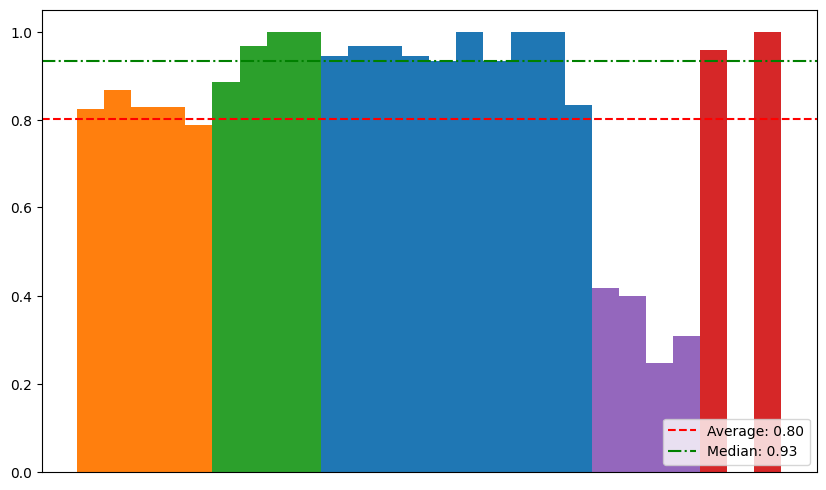

# of Tables: 26
Article ID: 2404.05566	   
Article ID: 2104.09677	   
Article ID: 2310.12450	   
Article ID: 1308.3357	   
Article ID: 1906.11180	   


In [4]:
full_articles_gt = os.path.join(ground_truth_path, "full_articles")

gt_results = eval.evaluate_extracted_articles(tables_file_path, full_articles_gt, False, False)

group_colors = display.plot_grouped_bars(gt_results)

print(f"# of Tables: {len(gt_results)}")

display.show_single_key_group_color(group_colors)

In [5]:
article_id = "2404.05566"
table_idx = "2"

path = os.path.join(full_articles_gt, Constants.LLM_ANSWER_DIR, f"{article_id}_{table_idx}" + ".txt")
table_claims = claim.extract_table_answers(path)
display.print_table_claims(0, table_claims)

similarities, pd_table, unique_values_extracted, claim_dict = eval.evaluate_extracted_article(tables_file_path, dataset_path, article_id, table_idx)

pd_table

	Table Index: 0
		Extracted Claims:
			specifications:
				Rank: 1,
				Dataset: Training,
				Probability: 76.74%,
			measure: None
			outcome: None


			specifications:
				Rank: 1,
				Dataset: Test,
				Probability: 79.55%,
			measure: None
			outcome: None


			specifications:
				Rank: 2,
				Dataset: Training,
				Probability: 4.92%,
			measure: None
			outcome: None


			specifications:
				Rank: 2,
				Dataset: Test,
				Probability: 4.19%,
			measure: None
			outcome: None


			specifications:
				Rank: 3,
				Dataset: Training,
				Probability: 1.76%,
			measure: None
			outcome: None


			specifications:
				Rank: 3,
				Dataset: Test,
				Probability: 1.14%,
			measure: None
			outcome: None


			specifications:
				Rank: 4,
				Dataset: Training,
				Probability: 1.09%,
			measure: None
			outcome: None


			specifications:
				Rank: 4,
				Dataset: Test,
				Probability: 0.64%,
			measure: None
			outcome: None


			specifications:
				Rank: ≥5,
				Dataset: Training,
		

,Rank,Training,Test
0,1,76.74,79.55
1,2,4.92,4.19
2,3,1.76,1.14
3,4,1.09,0.64
4,≥\geq 5,15.49,14.48


In [6]:
similarities

{'4.92': ['4.92'],
 'Training': ['Training'],
 '4.19': ['4.19'],
 '0.64': ['0.64'],
 'Test': ['Test'],
 '79.55': ['79.55'],
 '1.14': ['1.14'],
 'Rank': ['Rank'],
 '14.48': [],
 '1.76': ['1.76'],
 '3': ['3'],
 '\\geq 5': [],
 '1.09': ['1.09'],
 '76.74': ['76.74'],
 '4': ['4'],
 '2': ['2'],
 '1': ['1'],
 '15.49': ['1.14']}